In [57]:
from IPython.display import display
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sp
print("Sympy version:", sp.__version__)
print("Je vhodne mit sympy verze '1.0' a vyšší")
from sympy import *
from sympy.matrices import *
from sympy import pprint
from sympy.plotting import plot
import scipy
from scipy import constants
import matplotlib as plt
import numpy as np

from Geocentric import Geocentric
geoC = Geocentric(6378137, 6356752.314)

Sympy version: 1.0
Je vhodne mit sympy verze '1.0' a vyšší


Vytvoření symbolů pro následné dosazování

In [10]:
#G_t = Matrix(geoC.GeographicToGeocentric(47.347993, 5.515079, 190))

M1_x = sp.Symbol('M1_x')
M1_y = sp.Symbol('M1_y')
M1_z = sp.Symbol('M1_z')

M2_x = sp.Symbol('M2_x')
M2_y = sp.Symbol('M2_y')
M2_z = sp.Symbol('M2_z')

VEL = sp.Symbol('Velocity')

TX_x = sp.Symbol('TX_x')
TX_y = sp.Symbol('TX_y')
TX_z = sp.Symbol('TX_z')

TX_x = sp.Symbol('TX_x')
TX_y = sp.Symbol('TX_y')
TX_z = sp.Symbol('TX_z')

RX_x = sp.Symbol('RX_x')
RX_y = sp.Symbol('RX_y')
RX_z = sp.Symbol('RX_z')

t = sp.Symbol('time')

Ze symbolů vytvořit vektory

$TX = [TX_x, TX_y, TX_z]$<br>
$RX = [RX_x, RX_y, RX_z]$<br>
$M1 = [M1_x, M1_y, M1_z]$<br>
$M2 = [M2_x, M2_y, M2_z]$<br>

Spočítat vektor letu meteoru a normalizovat ho na jednotkový vektor.<br>
$MV = (M2 - M1)normalized$

Předpis pro polohu meteoru v čase ```time```.<br>
$MT = M1 + MV*time$

Poloha meteoru v case 'time':


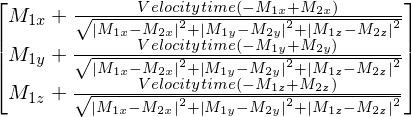

vektor pohybu meteoru


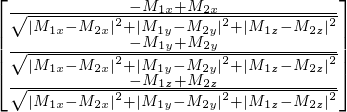

In [11]:
TX = Matrix([TX_x, TX_y, TX_z])  # poloha vysilace
RX = Matrix([RX_x, RX_y, RX_z])  # poloha stanice
M1 = Matrix([M1_x, M1_y, M1_z])  # prvni souradnice trajektorie
M2 = Matrix([M2_x, M2_y, M2_z])  # druha souradnice trajektorie
MV = (M2-M1).normalized()        # normalizovany vektor trajoktie

# poloha meteoru v case 'time'
MT = M1 + MV*VEL*t

print("Poloha meteoru v case 'time':")
display(MT)
print("vektor pohybu meteoru:")
display(MV)

Normálový vektor bistatické roviny.<br>
$ B_{pn} = (G_t - G_r) \times (G_t - M_t) $

Vytvoření vektorů:<br>
 * meteor - vysílač (```Vmt```)
 * meteor - stanice (```Vmr```)
 * Osa úhlu ```Vmt``` a ```Vmr``` (```Vba```)

```angle``` úhel mezi osou úhlu na bistatické rovině a vektorem letu meteoru.
```freq``` Dopplerovský posuv pro trajektorii letu v čase ```time```

Rovnice osy úhlu v bistatické rovině:


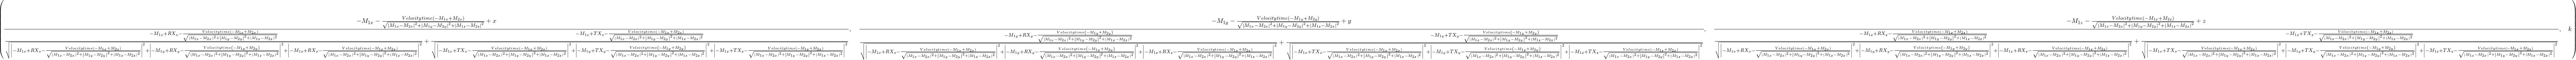

Rovnice trajektorie letu:


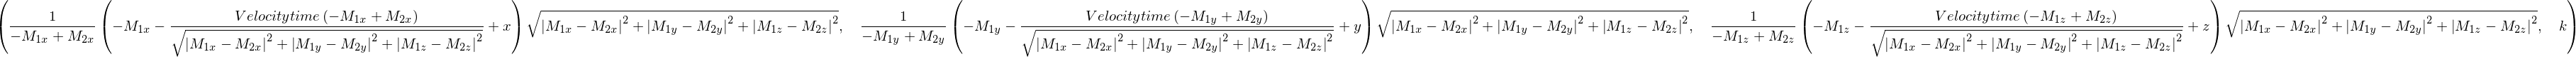

In [62]:
B_pn = (RX-TX).cross((RX-MT)) # bistatic plane normal

Vmt = (TX-MT).normalized()
Vmr = (RX-MT).normalized()
Vba = Vmt+Vmr

l1, l2 = Line3D(MT, MT+Vba), Line3D(MT, MT+MV)
angle = l1.angle_between(l2)
doppler = (1+(cos(angle)*VEL)/(constants.c))*143050000

print("Rovnice osy úhlu v bistatické rovině:")
display(l1.equation())
print("Rovnice trajektorie letu:")
display(l2.equation())
#display(B_pn)
#display(angle)

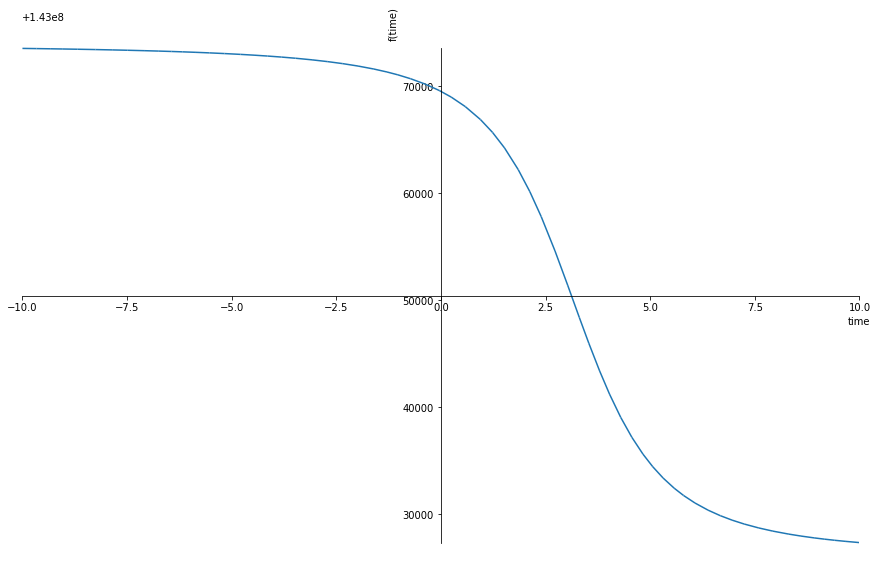

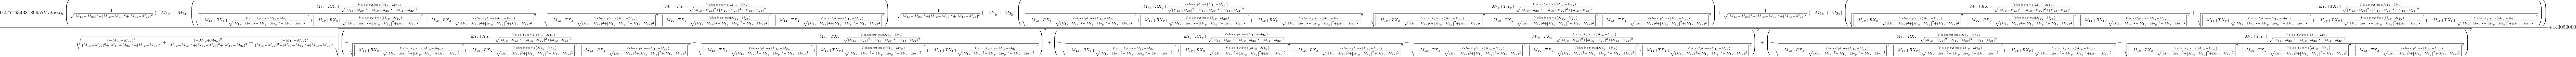

In [58]:
tran_co = geoC.GeographicToGeocentric(47.347993, 5.515079, 190)
stat_co = geoC.GeographicToGeocentric(49, 14.9, 300)
met1_co = geoC.GeographicToGeocentric(47, 11, 100000)
met2_co = geoC.GeographicToGeocentric(50, 9,  100000)

doppler_val = doppler

doppler_val = doppler_val.subs({
    'TX_x': tran_co[0],
    'TX_y': tran_co[1],
    'TX_z': tran_co[2],
    
    'RX_x': stat_co[0],
    'RX_y': stat_co[1],
    'RX_z': stat_co[2]
})

doppler_val = doppler_val.subs({
    'M1_x': met1_co[0],
    'M1_y': met1_co[1],
    'M1_z': met1_co[2],
    
    'M2_x': met2_co[0],
    'M2_y': met2_co[1],
    'M2_z': met2_co[2]
    
    #'Velocity': 50000
})

plot(doppler_val.subs(VEL, 50000), (t, -10, 10))
display(doppler)

In [31]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 10


# Interaktivní simulátor

Jako vstup lze nastavit dva body trajektorie letu meteoru pomocí geografických souřadnic (Souřadnice v desetinných stupních, výška v metrech).
Dále poloha přijímací stanice a sliderem se nastavuje rychlost letu meteoru (v km/h)

In [53]:
a = widgets.IntSlider(50, description="Velocity [km/s]", continuous_update=False)
m1_a = widgets.FloatText(value=47, description='M1 LAT:', continuous_update=False)
m1_b = widgets.FloatText(value=11, description='m1 LON:', continuous_update=False)
m1_c = widgets.FloatText(value=70000, description='m1 ALT:', continuous_update=False)
m2_a = widgets.FloatText(value=50, description='M2 LAT:', continuous_update=False)
m2_b = widgets.FloatText(value=9, description='m2 LON:', continuous_update=False)
m2_c = widgets.FloatText(value=30000, description='m2 ALT:', continuous_update=False)
rx_a = widgets.FloatText(value=49, description='station LAT:', continuous_update=False)
rx_b = widgets.FloatText(value=14, description='station LON:', continuous_update=False)
rx_c = widgets.FloatText(value=300, description='station ALT:', continuous_update=False)
ui = widgets.HBox([a])
ui2 = widgets.HBox([m1_a, m1_b, m1_c])
ui3 = widgets.HBox([m2_a, m2_b, m2_c])
ui4 = widgets.HBox([rx_a, rx_b, rx_c])

def f(vel, m1_a, m1_b, m1_c, m2_a, m2_b, m2_c, rx_a, rx_b, rx_c):
    print('Meteor velocity:', vel)

    tran_co = geoC.GeographicToGeocentric(47.347993, 5.515079, 190)
    stat_co = geoC.GeographicToGeocentric(rx_a, rx_b, rx_c)
    met1_co = geoC.GeographicToGeocentric(m1_a, m1_b, m1_c)
    met2_co = geoC.GeographicToGeocentric(m2_a, m2_b, m2_c)

    doppler_val = doppler.subs({
        'TX_x': tran_co[0],
        'TX_y': tran_co[1],
        'TX_z': tran_co[2],

        'RX_x': stat_co[0],
        'RX_y': stat_co[1],
        'RX_z': stat_co[2],

        'M1_x': met1_co[0],
        'M1_y': met1_co[1],
        'M1_z': met1_co[2],

        'M2_x': met2_co[0],
        'M2_y': met2_co[1],
        'M2_z': met2_co[2],

        'Velocity': vel*1000
    })

    plot(doppler_val, (t, -10, 10))

out = widgets.interactive_output(f, {'vel': a, 'm1_a': m1_a, 'm1_b': m1_b, 'm1_c': m1_c,
                                     'm2_a': m2_a, 'm2_b': m2_b, 'm2_c': m2_c,
                                     'rx_a': rx_a, 'rx_b': rx_b, 'rx_c': rx_c})

display(ui, ui2, ui3, ui4, out)


HBox(children=(IntSlider(value=50, continuous_update=False, description='Velocity [km/s]'),))

HBox(children=(FloatText(value=47.0, description='M1 LAT:'), FloatText(value=11.0, description='m1 LON:'), FloatText(value=70000.0, description='m1 ALT:')))

HBox(children=(FloatText(value=50.0, description='M2 LAT:'), FloatText(value=9.0, description='m2 LON:'), FloatText(value=30000.0, description='m2 ALT:')))

HBox(children=(FloatText(value=49.0, description='station LAT:'), FloatText(value=14.0, description='station LON:'), FloatText(value=300.0, description='station ALT:')))

Output()

# Dále jsou jen zkušební části

Tady si určím vektor tvořící osu úhlu (Vysilac-meteor-přijímač)

In [86]:
met_vys =(RX-MT).normalized()
met_sta =(TX-MT).normalized()
point = Matrix((met_vys+met_sta)/2)
bistatic_axis = sp.Point(MT-point)

display(met_vys)
display(met_sta)
display(point)
display(type(point))

ValueError: Only two dimensional points currently supported

In [45]:
tran_co = geoC.GeographicToGeocentric(47.347993, 5.515079, 190)
stat_co = geoC.GeographicToGeocentric(49, 14.9, 300)
met1_co = geoC.GeographicToGeocentric(47, 11, 100000)
met2_co = geoC.GeographicToGeocentric(50, 9, 50000)
mete_co = Matrix(met1_co).row_insert(3, (Matrix(met2_co)-Matrix(met1_co)).normalized())

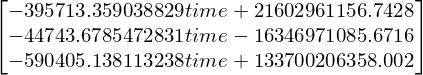

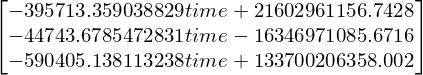

In [80]:
BMs = BM.subs({
    'TX_x': tran_co[0],
    'TX_y': tran_co[1],
    'TX_z': tran_co[2],
    
    'RX_x': stat_co[0],
    'RX_y': stat_co[1],
    'RX_z': stat_co[2],
    
    'M1_x': met1_co[0],
    'M1_y': met1_co[1],
    'M1_z': met1_co[2],
    
    'M2_x': met2_co[0],
    'M2_y': met2_co[1],
    'M2_z': met2_co[2],
})

display(BMs)
#sp.solvers.solve_linear(BM, t)


display(BMs)
display(sp.solve(BMs, t))
BMs.LDLsolve(Matrix([0,0,0]))

In [180]:
pprint(BM.subs({
    'Rx_coord': stat_co,
    'Tx_coord': tran_co,
    'Met_coord': mete_co,
}))

(((-Rx_coord_00 + Tx_coord_00)⋅(-time⋅Met_coord_40 + Met_coord_10 + Tx_coord_1
0) - (-Rx_coord_10 + Tx_coord_10)⋅(-time⋅Met_coord_30 + Met_coord_00 + Tx_coor
d_00))⋅Met_coord_30 - ((-Rx_coord_10 + Tx_coord_10)⋅(-time⋅Met_coord_50 + Met_
coord_20 + Tx_coord_20) - (-Rx_coord_20 + Tx_coord_20)⋅(-time⋅Met_coord_40 + M
et_coord_10 + Tx_coord_10))⋅Met_coord_50)⋅(-(-Rx_coord_00 + Tx_coord_00)⋅(-tim
e⋅Met_coord_50 + Met_coord_20 + Tx_coord_20) + (-Rx_coord_20 + Tx_coord_20)⋅(-
time⋅Met_coord_30 + Met_coord_00 + Tx_coord_00)) + (-((-Rx_coord_00 + Tx_coord
_00)⋅(-time⋅Met_coord_40 + Met_coord_10 + Tx_coord_10) - (-Rx_coord_10 + Tx_co
ord_10)⋅(-time⋅Met_coord_30 + Met_coord_00 + Tx_coord_00))⋅Met_coord_40 + (-(-
Rx_coord_00 + Tx_coord_00)⋅(-time⋅Met_coord_50 + Met_coord_20 + Tx_coord_20) +
 (-Rx_coord_20 + Tx_coord_20)⋅(-time⋅Met_coord_30 + Met_coord_00 + Tx_coord_00
))⋅Met_coord_50)⋅((-Rx_coord_10 + Tx_coord_10)⋅(-time⋅Met_coord_50 + Met_coord
_20 + Tx_coord_20) - (-Rx_coord_20 + Tx_coord_20)⋅(-

In [183]:
pprint((M_v.subs('Meteor', Matrix([0,1,2,3,4,5]) )))

⎡Met_coord_30⎤
⎢            ⎥
⎢Met_coord_40⎥
⎢            ⎥
⎣Met_coord_50⎦


In [226]:
t_a = sp.MatrixSymbol('t_a', 3,3)
t_b = sp.MatrixSymbol('t_b', 3,3)

pprint(Matrix(t_a))
pprint(eye(3))
pprint(Matrix(t_b).subs({'t_b_00': 4}))

t_X = Matrix(t_a).cross(Matrix(t_b))

⎡tₐ ₀₀  tₐ ₀₁  tₐ ₀₂⎤
⎢                   ⎥
⎢tₐ ₁₀  tₐ ₁₁  tₐ ₁₂⎥
⎢                   ⎥
⎣tₐ ₂₀  tₐ ₂₁  tₐ ₂₂⎦
⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦
⎡t_b_00  t_b_01  t_b_02⎤
⎢                      ⎥
⎢t_b_10  t_b_11  t_b_12⎥
⎢                      ⎥
⎣t_b_20  t_b_21  t_b_22⎦


ShapeError: Dimensions incorrect for cross product.

In [ ]:
x = MatrixSymbol('x', 3, 3)

P = x**2 - 3*eye(3)

In [114]:
tx_met = Matrix(Line3D(Point3D(TX), Point3D(MT)).direction_cosine)
rx_met = Matrix(Line3D(Point3D(RX), Point3D(MT)).direction_cosine)
axis_bp = ((tx_met+rx_met)/2).normalized()
ang_met = Line3D(Point3D(MT-axis_bp), Point3D(MT))
met_line = Line3D(Point3D(M1), Point3D(M2))

#display(axis_bp)
print('angle >')
angle  = ang_met.angle_between(met_line)
print("<angle")

axis_bp = angle.subs({
    'TX_x': tran_co[0],
    'TX_y': tran_co[1],
    'TX_z': tran_co[2],
    
    'RX_x': stat_co[0],
    'RX_y': stat_co[1],
    'RX_z': stat_co[2],
    
    'M1_x': met1_co[0],
    'M1_y': met1_co[1],
    'M1_z': met1_co[2],
    
    'M2_x': met2_co[0],
    'M2_y': met2_co[1],
    'M2_z': met2_co[2],
})
display()
display(axis_bp.subs({'time': 3}))

angle >
<angle


In [137]:
display(axis_bp.subs({'time': 100}))

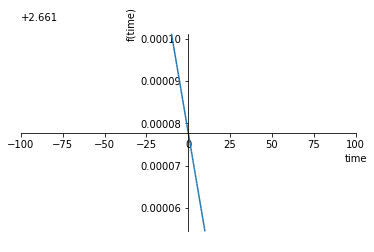

In [136]:
sp.plot(axis_bp, xlim=(-100, 100))